In [14]:
import json, glob
import numpy as np
import xnetwork as xn
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import MaxNLocator

In [5]:
def format_title_journal(name1):
    print(name1)
    name = name1.title()
    name = name.replace('Mater', 'Mat')
    name = name.replace('Acs', 'ACS')
    name = name.replace('Appl. Mat. Interfaces', 'AMI')
    return name

In [7]:
n_comm = 14
# files = glob.glob('impact_factor/impact_factor_dist_*010622_IFv2.json')
# files2 = glob.glob('impact_factor_dist_*_231222.json')
# print(files)
cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.arange(15))
outer_colors[-1][0] = 0.73
outer_colors[-1][1] = 0.73
outer_colors[-1][2] = 0.73
outer_colors[-1][3] = 1.0
print(outer_colors)

[[0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [1.         0.73333333 0.47058824 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [1.         0.59607843 0.58823529 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.76862745 0.61176471 0.58039216 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.96862745 0.71372549 0.82352941 1.        ]
 [0.73       0.73       0.73       1.        ]]


In [6]:
files[5:6]

['impact_factor/impact_factor_dist_J. Am. Chem. Soc._010622_IFv2.json']

In [10]:
maxyear = 2020
output_json = dict()
files = ['impact_factor_dist_ACS Appl. Mater. Interfaces_120423.json']
# for file in files + files2:
# for file in files[5:6]:
for file in files:
    journal = format_title_journal(file[len('impact_factor_dist_'):-len('_120423.json')])
    if '0622' in journal:
        journal = 'Nat. Mat.'
        
    min_global = 6666
    max_global = 0
    cits_bardo = json.loads(open(file).read())
    H = []
    for field, impact_per_year in cits_bardo.items():
        min_year = min(impact_per_year.keys())
        print(min_year)
        if int(min_year) < int(min_global):
            min_global = min_year
    min_global = int(min_global)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        IF = []
        for y in range(int(min_global), maxyear+1):
            if str(y) in impact_per_year:
                IF.append(impact_per_year[str(y)])
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
        
        
        last_if.append(IF[-1])
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    
    output_json[journal] = dict()
    i = 1
        
    
    for label, IF in zip(labels, H):
        if 'Others' in label:
            label = 'Other'
        output_json[journal][label] = {'x': list(range(int(min_global), maxyear+1)), 'y': IF, 'c':list(outer_colors[i-1]), 'ratio':ratio}
        i += 1


# json_str = json.dumps(output_json)
# out = open('impact_factor_data_to_plot.json', 'w')
# out.write(json_str)
# out.close()

J. Am. Chem. Soc.
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997


Adv. Funct. Mater._17042


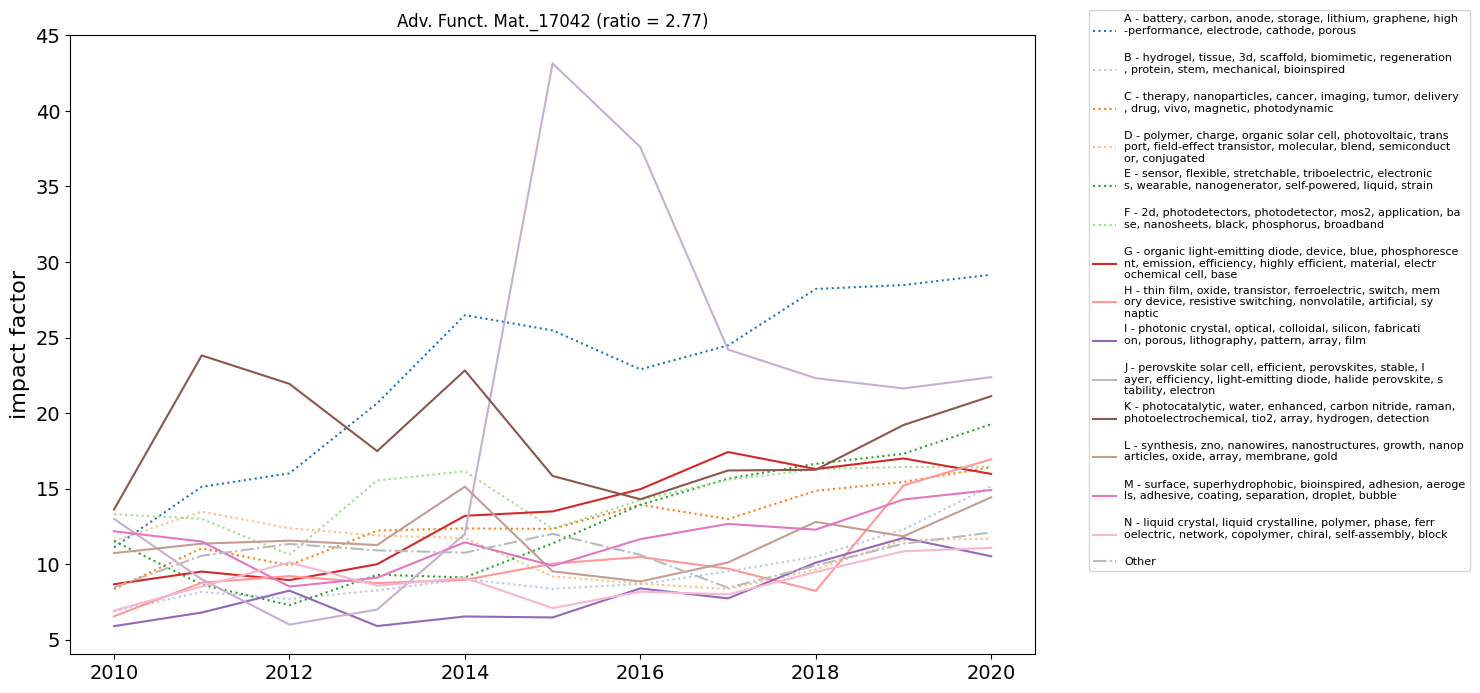

In [19]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
maxyear = 2020
files = ['impact_factor_dist_ACS Appl. Mater. Interfaces_120423.json', 'impact_factor_dist_Adv. Funct. Mater._120423.json']
files = ['impact_factor_dist_Adv. Funct. Mater._170423_top15.json']

for file in files:

    min_global = 6666
    max_global = 0
    cits_bardo = json.loads(open(file).read())
    H = []
    for field, impact_per_year in cits_bardo.items():
        min_year = min(impact_per_year.keys())
        if int(min_year) < int(min_global):
            min_global = min_year
    min_global = int(min_global)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    fg = plt.figure(figsize=(15, 7))
    ax = fg.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        IF = []
        for y in range(int(min_global), maxyear+1):
            if str(y) in impact_per_year:
                IF.append(impact_per_year[str(y)])
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
        
        
        last_if.append(IF[-1])

    i = 1
    for label, IF in zip(labels, H):
        markercode = 'dotted' if i < 7 else '-'
        if 'Others' in label:
            label = 'Other'
            markercode = '-.'
        plt.plot(list(range(int(min_global), maxyear+1)), IF, label=label, color=outer_colors[i-1], linestyle=markercode)
        i += 1
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    plt.title(format_title_journal(file[len('impact_factor_dist_'):-len('_120423.json')]) + " (ratio = %.2f)" % ratio)
    plt.legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.05))
    plt.ylabel('impact factor', fontsize=16)
    
    plt.tight_layout()
    
    plt.savefig(file.replace('.json', '_impact_factor_130423.pdf'))

In [107]:
def plot_comm_size(file, ax):
    net_ami = xn.xnet2igraph(file)
    years = sorted(np.unique(net_ami.vs['year']))
    years = list(range(max(2000, int(years[0])+1), 2021))
    comms_size = defaultdict(lambda:[])

    name_unique = set(net_ami.vs['cluster_top10'])

    X = []
    for year in sorted(years):
        X.append(year)
        vertex_seq = net_ami.vs.select(year_eq=year)
        N = len(vertex_seq)
        subg  = net_ami.subgraph(vertex_seq)

        unique,count = np.unique(subg.vs['cluster_top10'], return_counts=True)
        for u,c in zip(unique, count):
            comms_size[u].append(100*c/N)

        for missing in name_unique - set(unique):
            comms_size[missing].append(0)

    labels = []
    hists = []
    others = []
    comms_size_sorted = dict(sorted(comms_size.items(), key = lambda x: x[0]))
    count_l = 0
    for label, hist in comms_size_sorted.items():
        count_l += 1
        if count_l > 9:
            others.append(hist)
#             continue
        else:
            labels.append(label[:60] + '\n' + label[60:120] + '\n' + label[120:])
            hists.append(hist)
        
    others = np.sum(others, axis=0)
    hists.append(others)
    labels.append('Others')
    cmap = plt.get_cmap("tab10")
    outer_colors = cmap(np.arange(9))
    
    outer_colors = outer_colors.tolist()
    outer_colors.append([0.8, 0.8, 0.8, 1])
    ax.stackplot(X, *hists, labels=labels, colors=outer_colors)
    ax.margins(0,0)
    ax.set_xticks([])
#     plt.xticks(years, rotation=45)
#     plt.legend(prop={'size': 7}, bbox_to_anchor=(1.7,1.2))
    ax.set_ylabel('%', fontsize=16)
#     ax.set_xlabel('year')
    return years

In [108]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
maxyear = 2020

def plot_impact_factor(cits_bardo, ax, years):
    print(years)
    min_global = 6666
    max_global = 0
    H = []
#     for field, impact_per_year in cits_bardo.items():
#         min_year = impact_per_year[0][0] #min
#         if int(min_year) < int(min_global):
#             min_global = min_year
#     min_global = int(min_global)
    min_global = max(years[0], 2000)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        min_x = years[0]
        max_x = years[-1]
        impact_per_year = dict(impact_per_year)
        
        IF = []
        for year in range(min_x, max_x+1):
            if year in impact_per_year:
                impact = impact_per_year[year]
                IF.append(impact)
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
    
        last_if.append(IF[-1])

    i = 1
    for label, IF in zip(labels, H):
        markercode = 'dotted' if i < 5 else '-'
        if 'Others' in label:
            label = 'Others'
            markercode = '-.'
        ax.plot(years, IF, label=label, color=outer_colors[i-1], linestyle=markercode)
        i += 1
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    ax.legend(prop={'size': 10}, bbox_to_anchor=(1.05,1.05))
    ax.set_ylabel('impact factor', fontsize=16)
    ax.margins(0,0)
    ax.set_xlabel('year', fontsize=16)
    return ratio

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[2003, 2004, 2005, 2006, 2007, 2008, 2009,

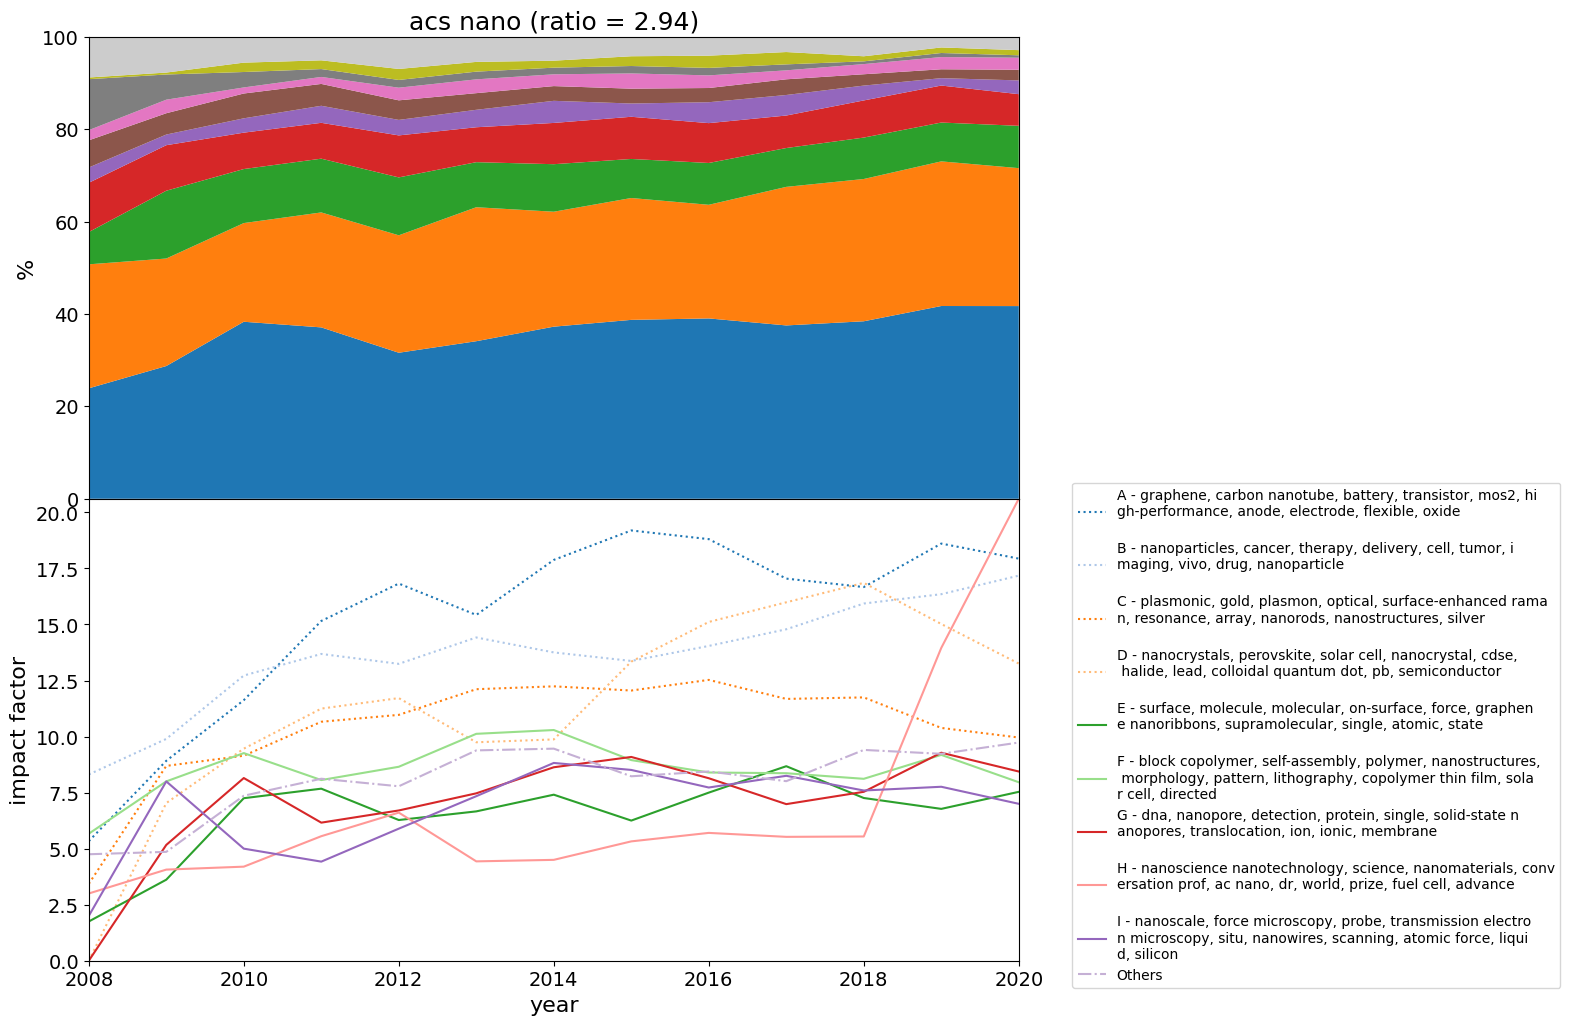

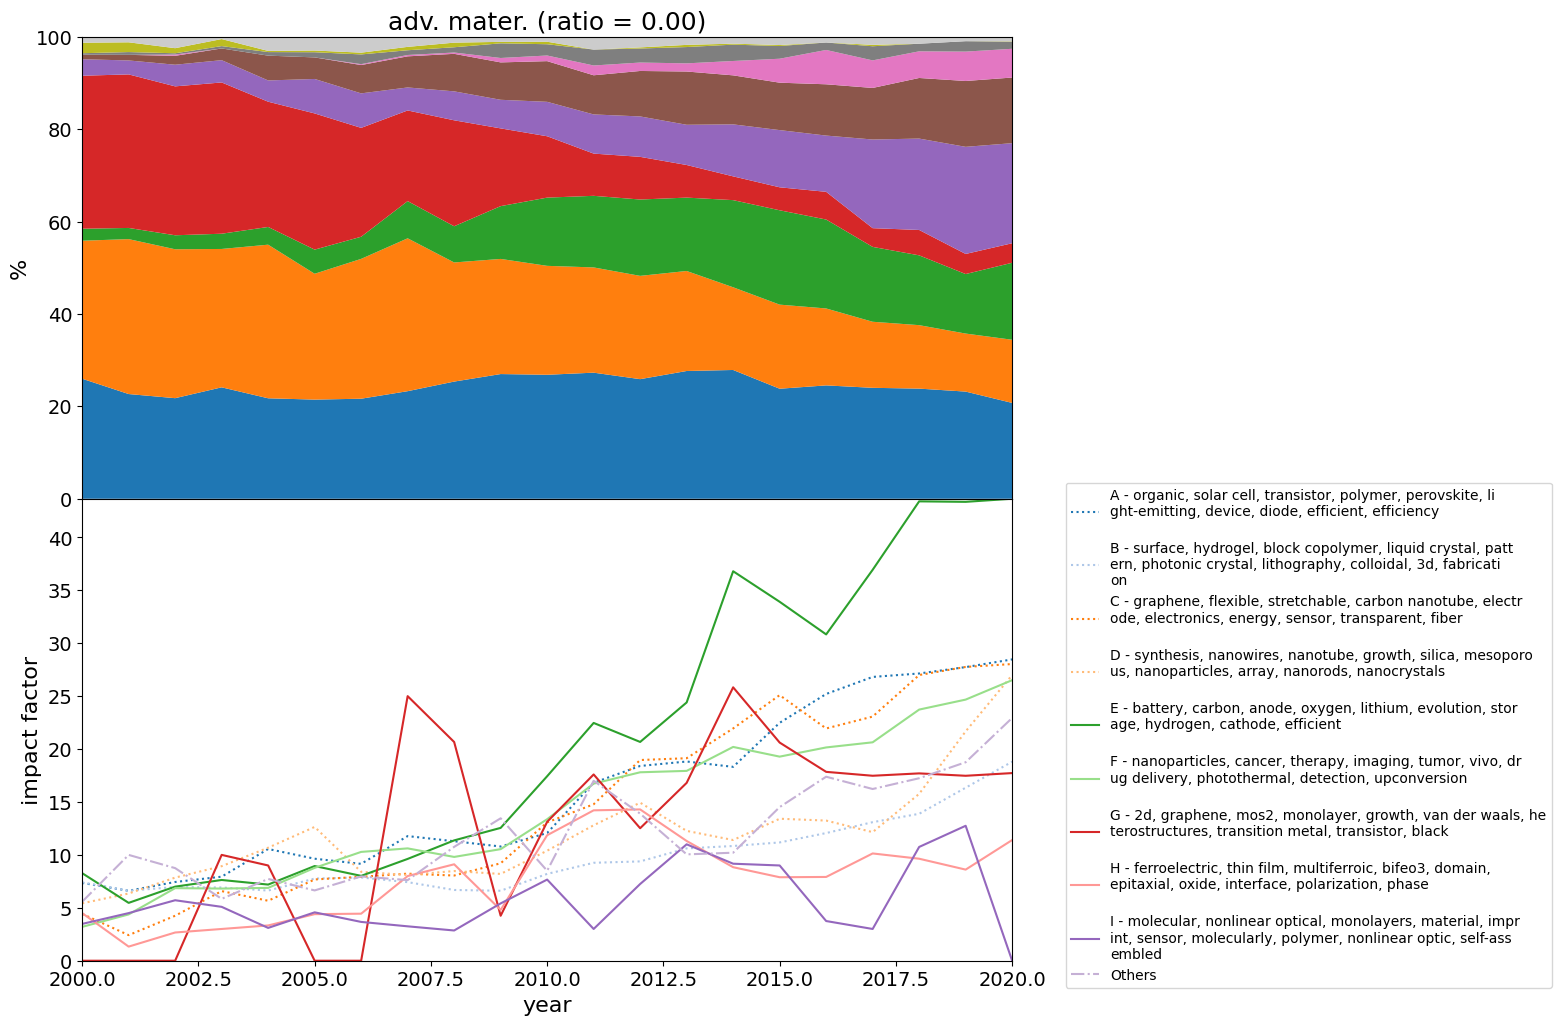

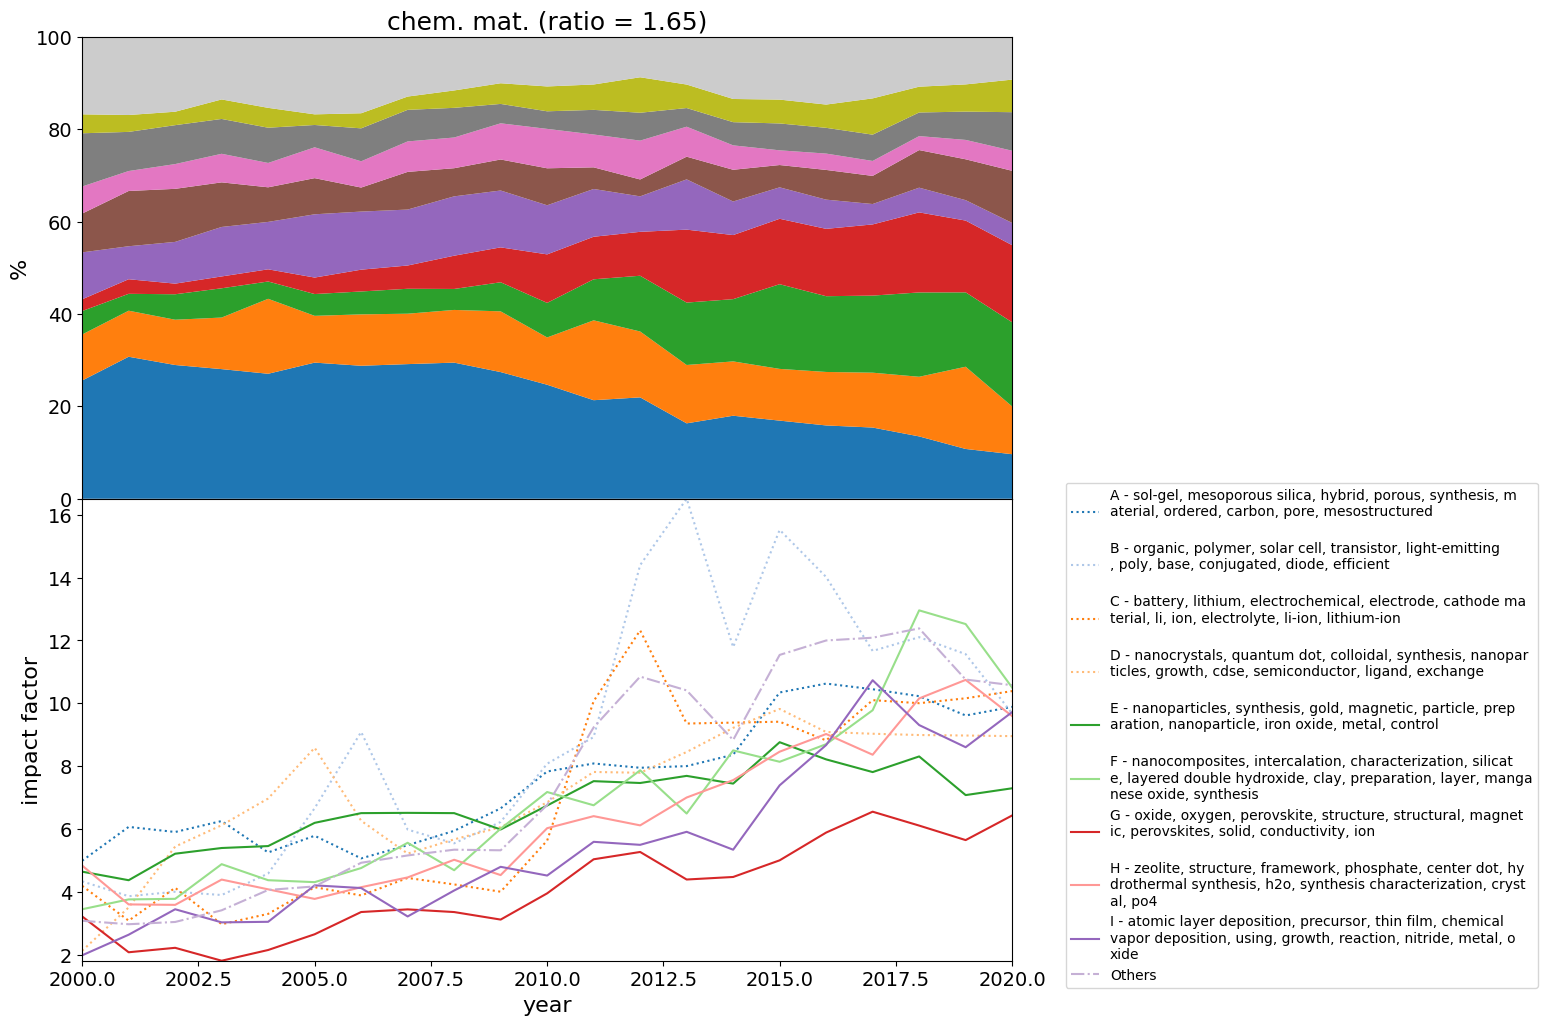

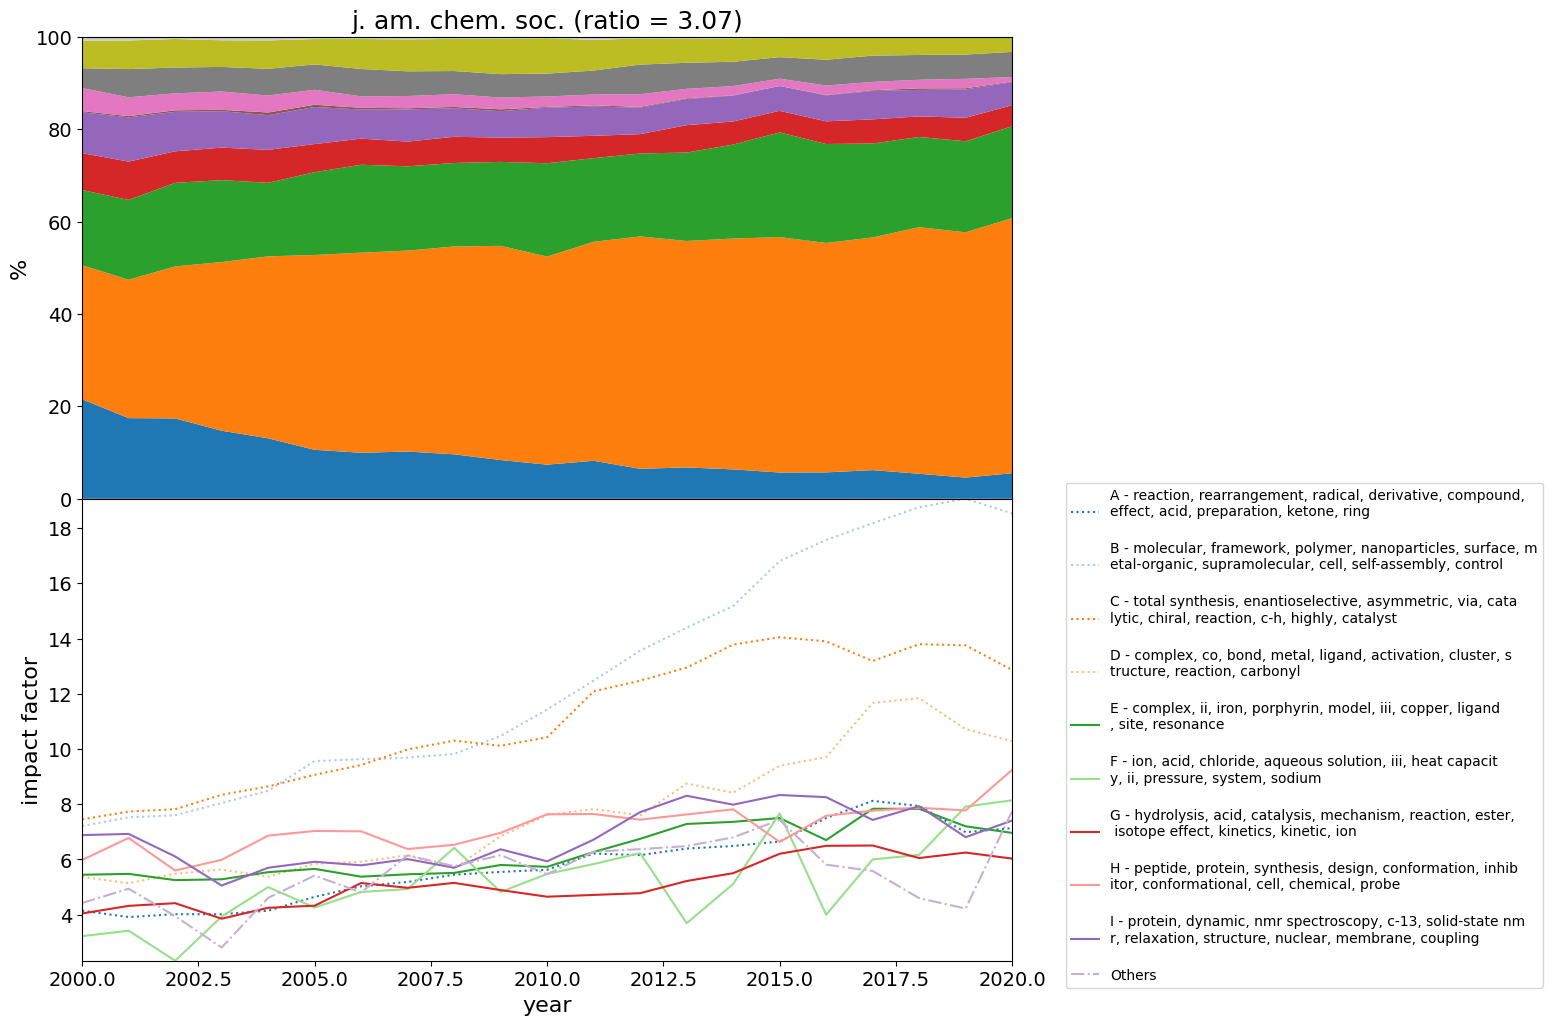

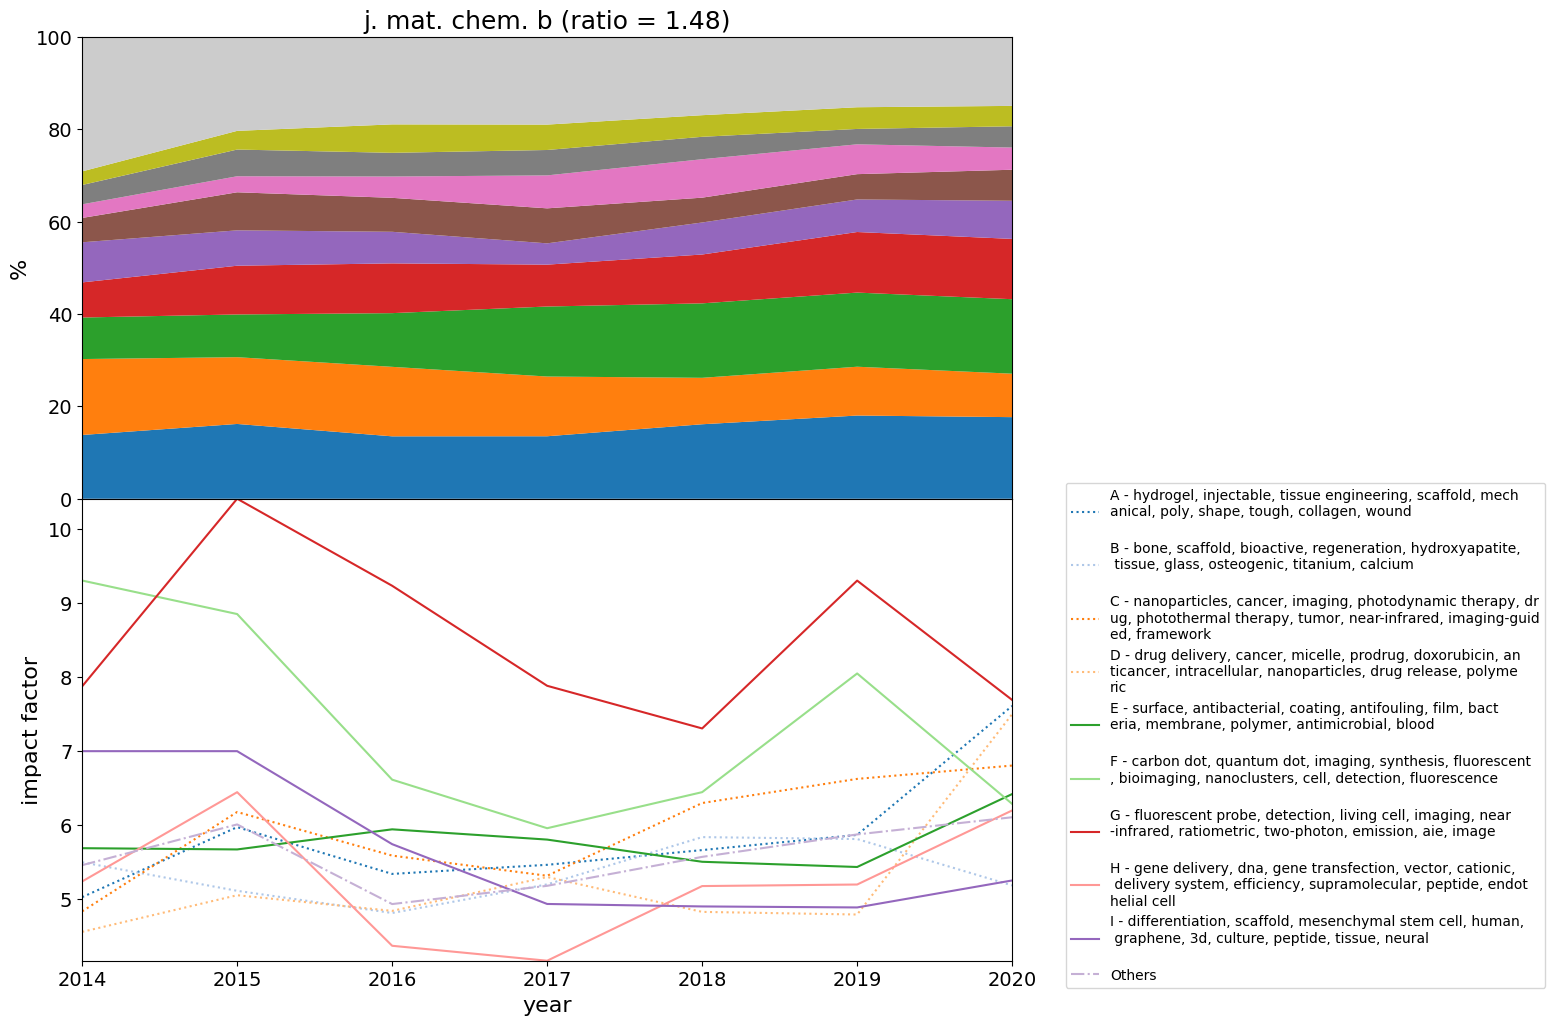

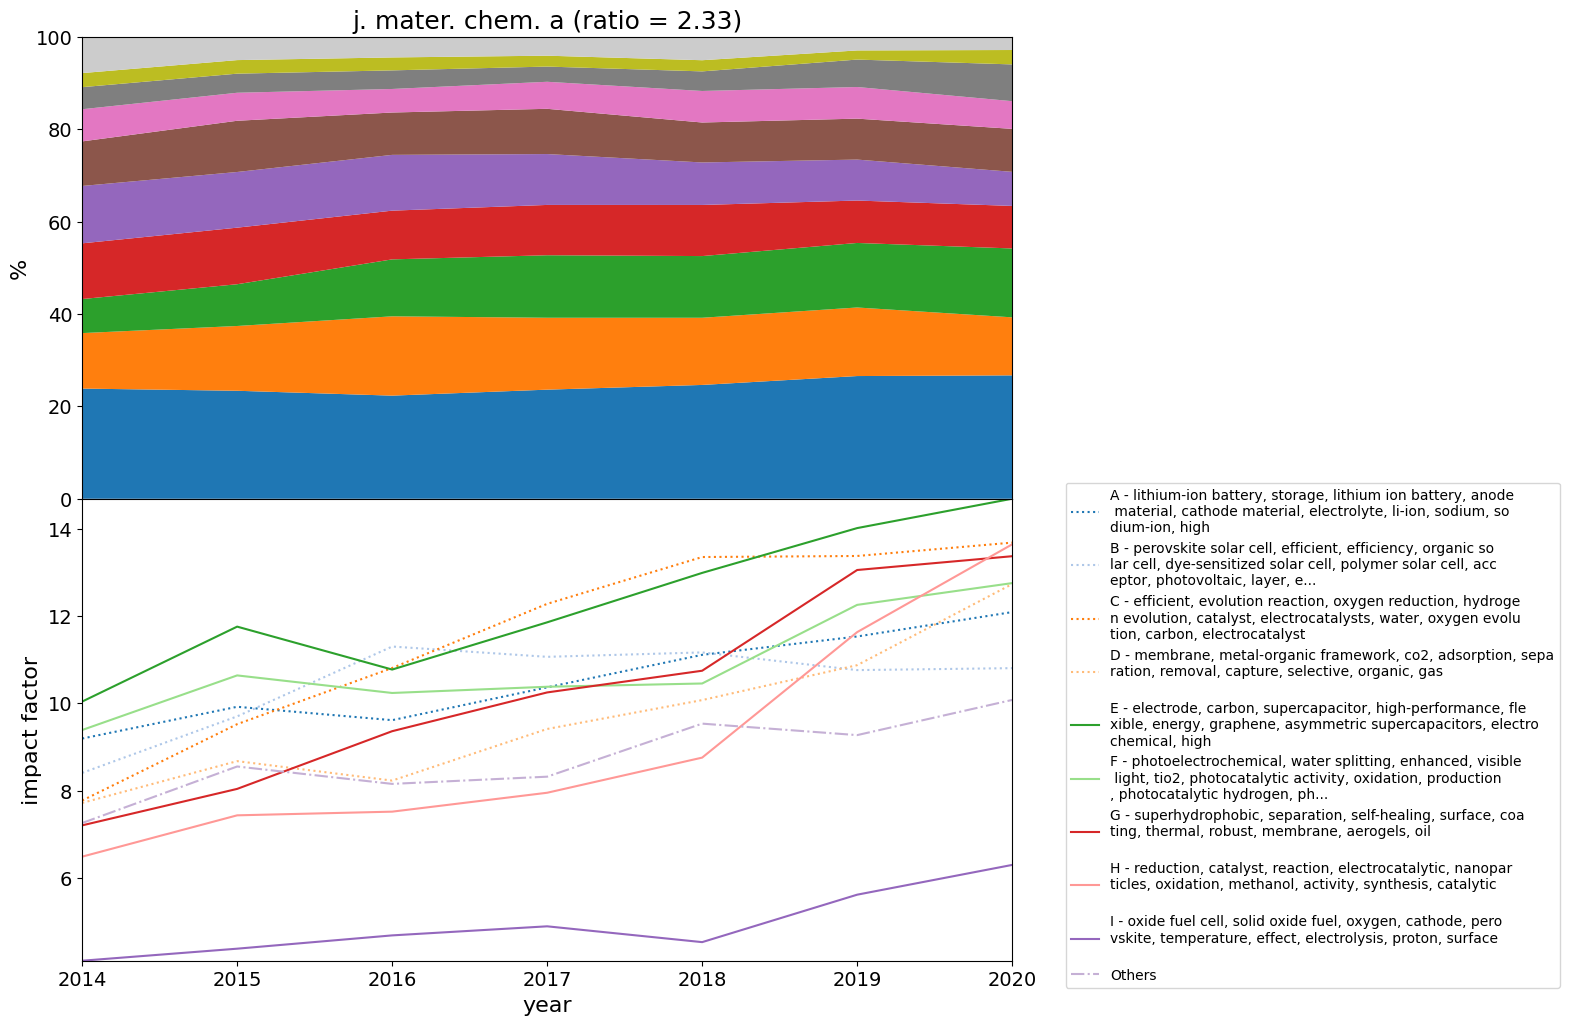

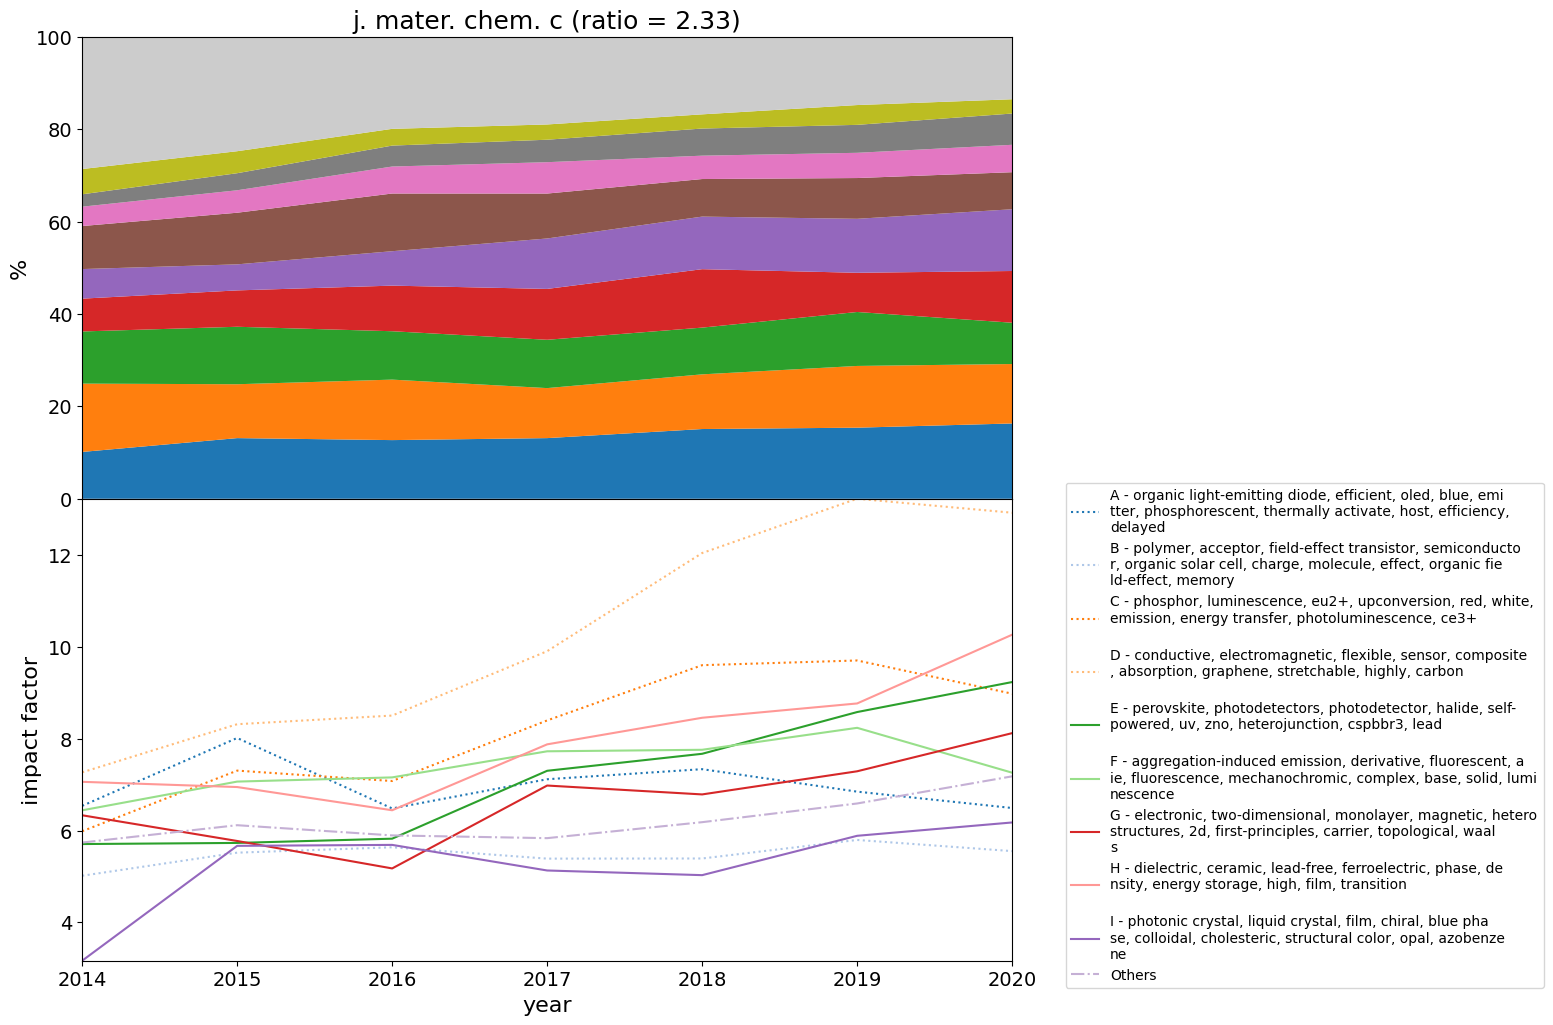

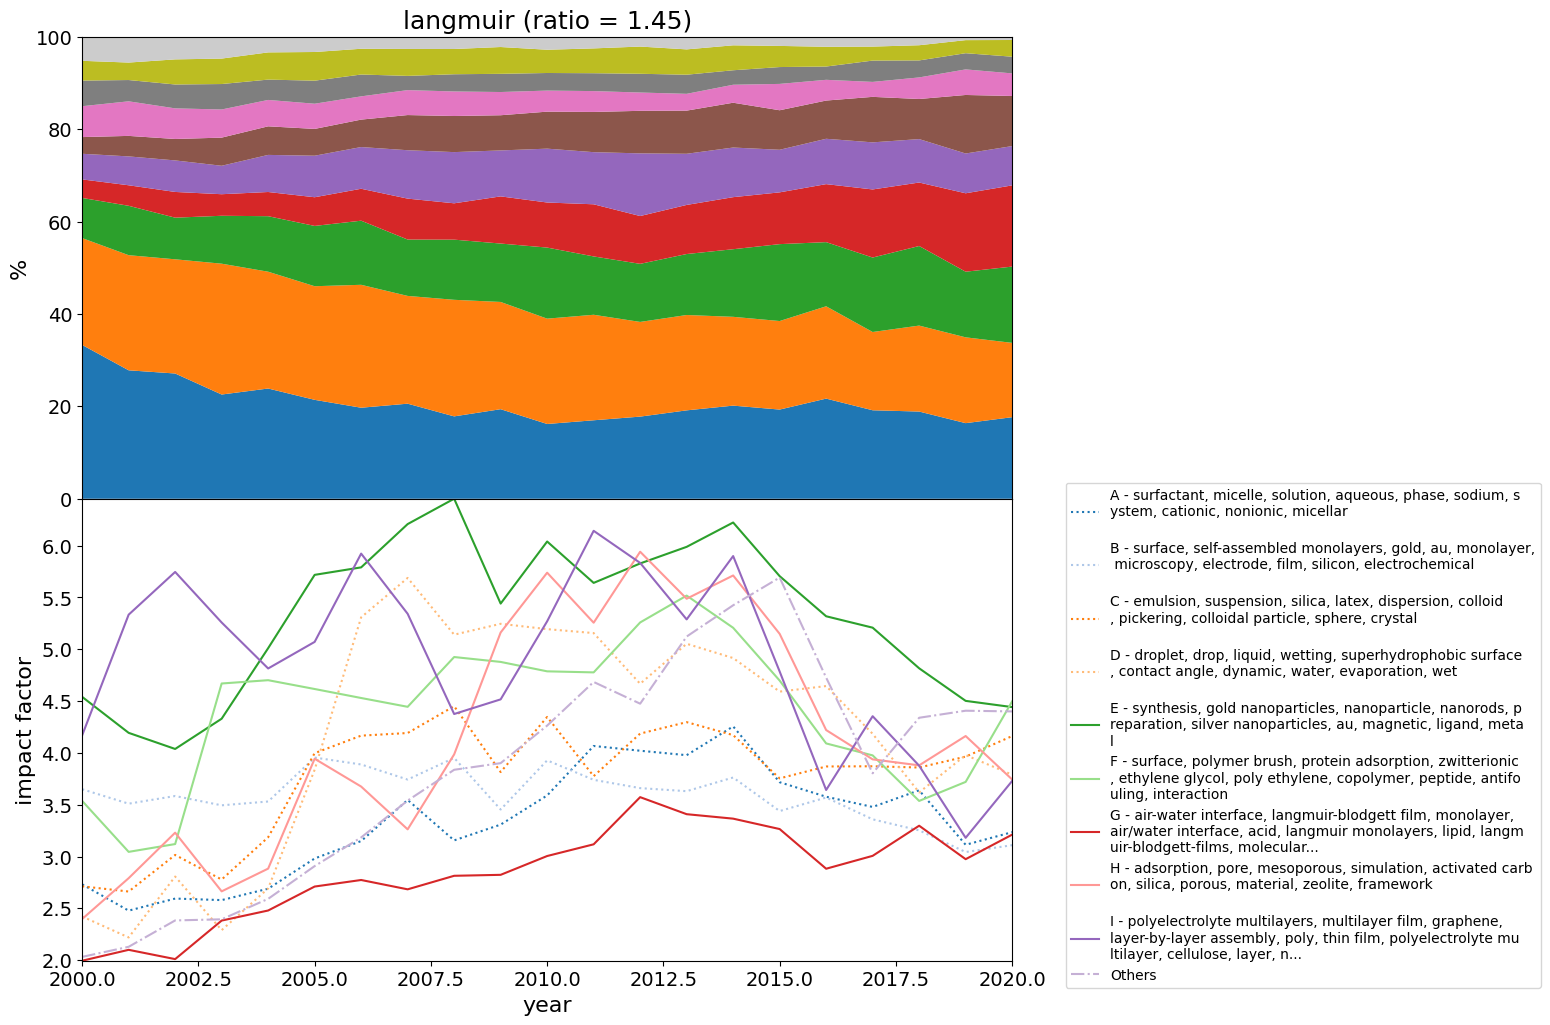

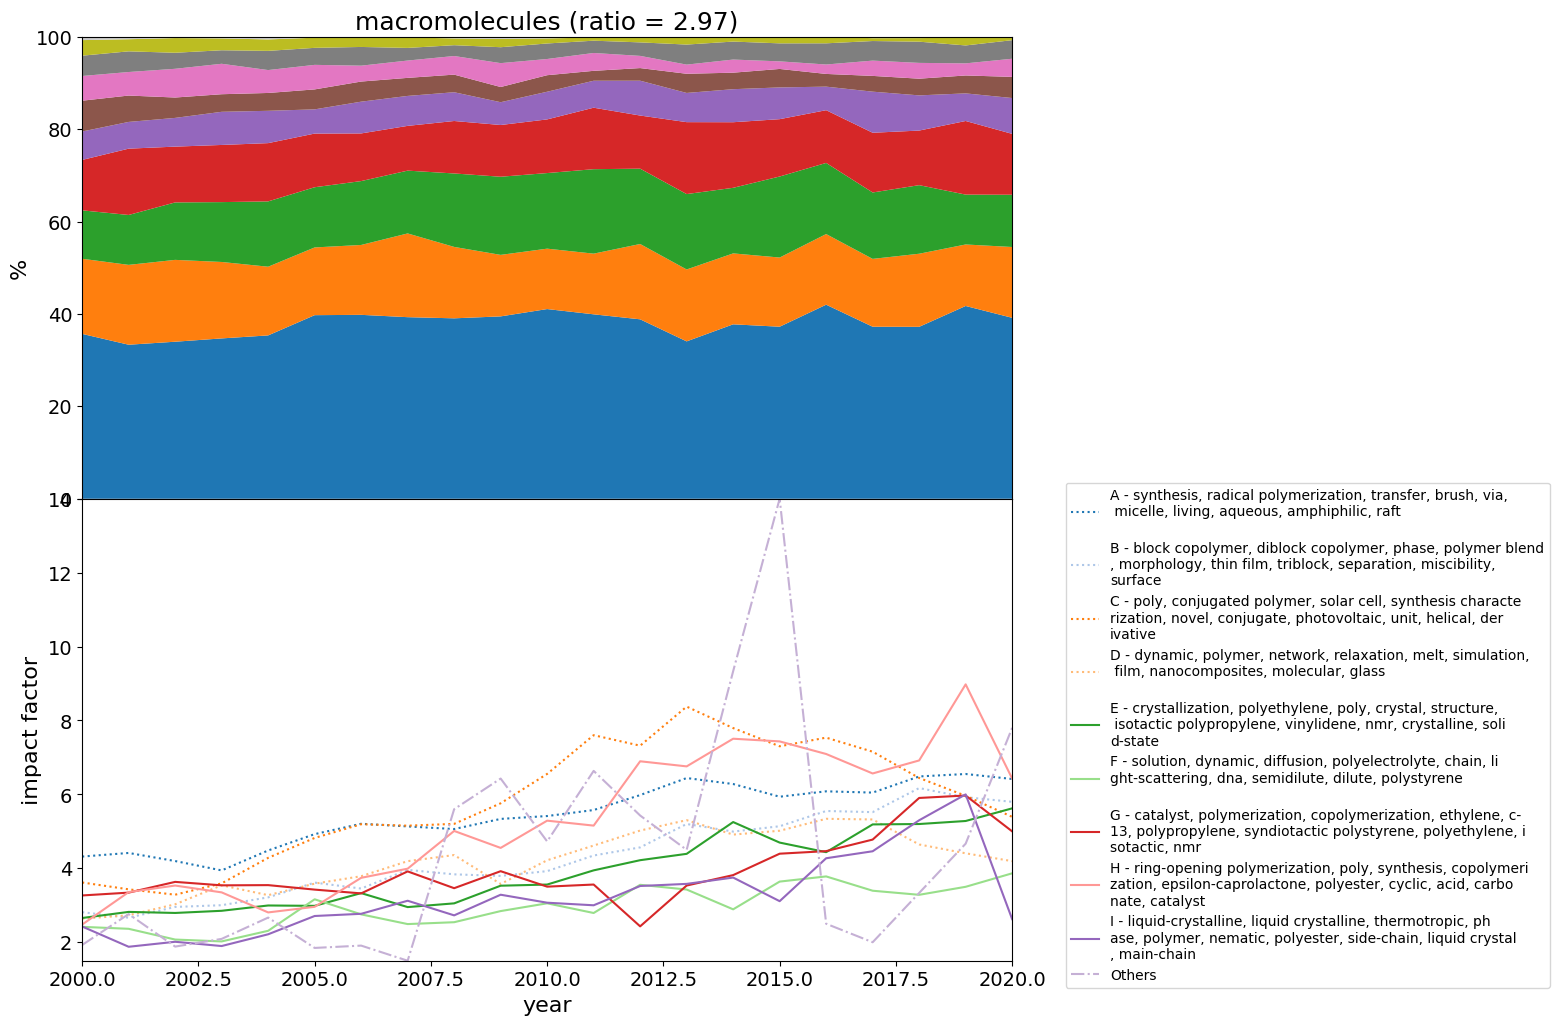

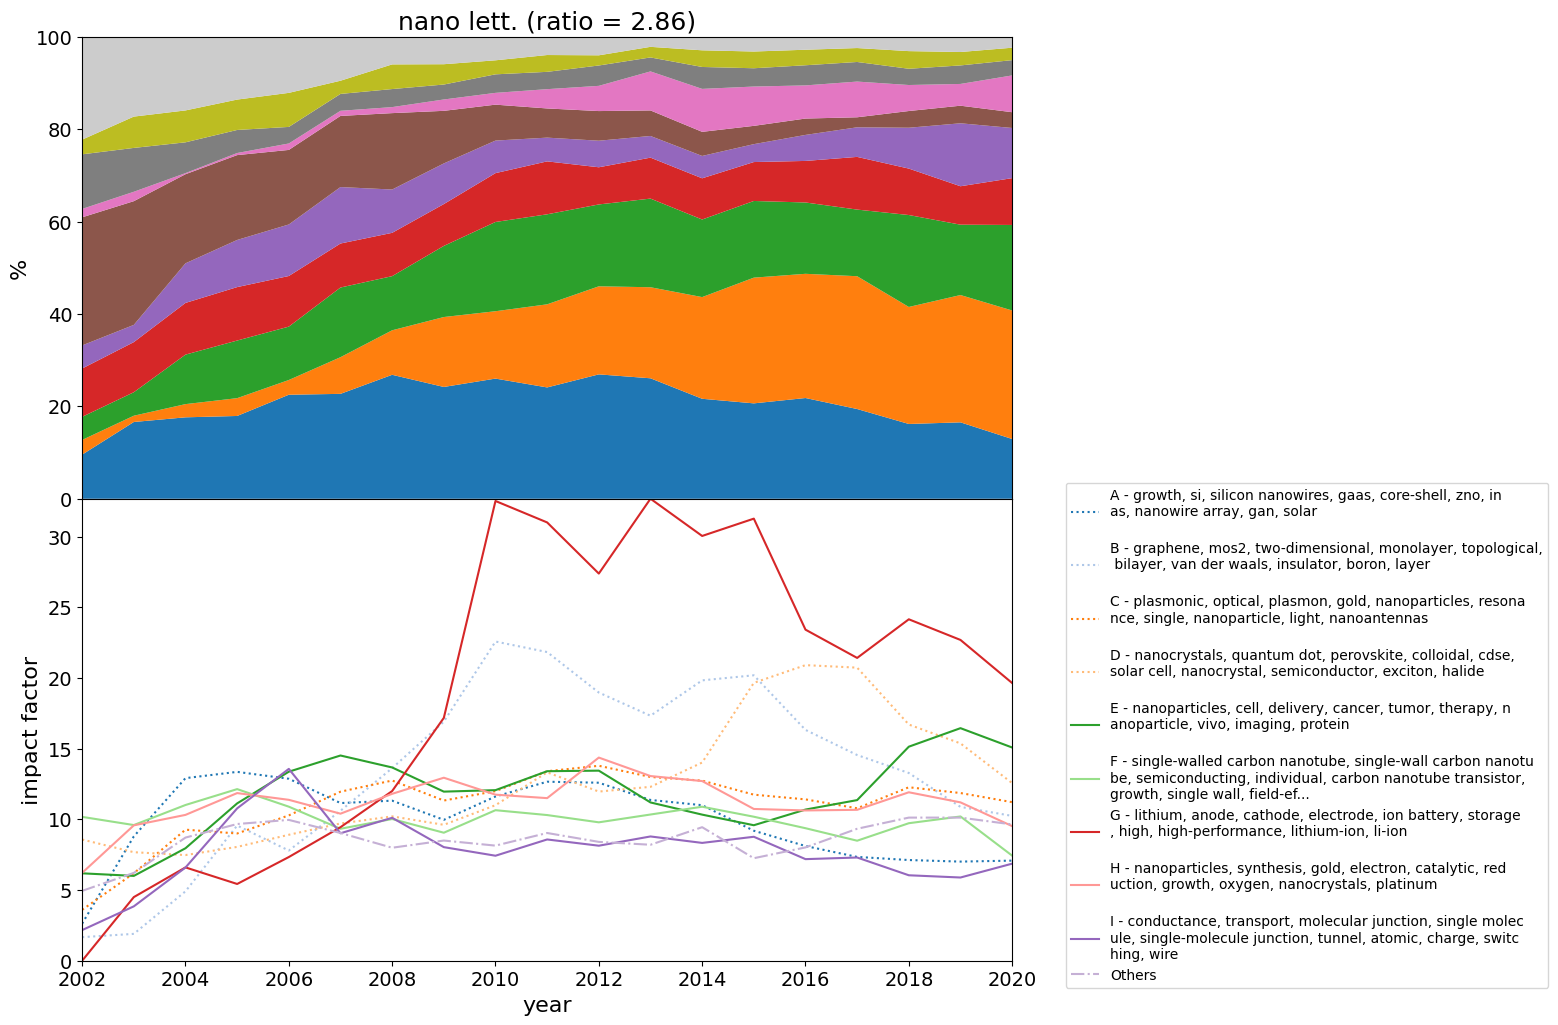

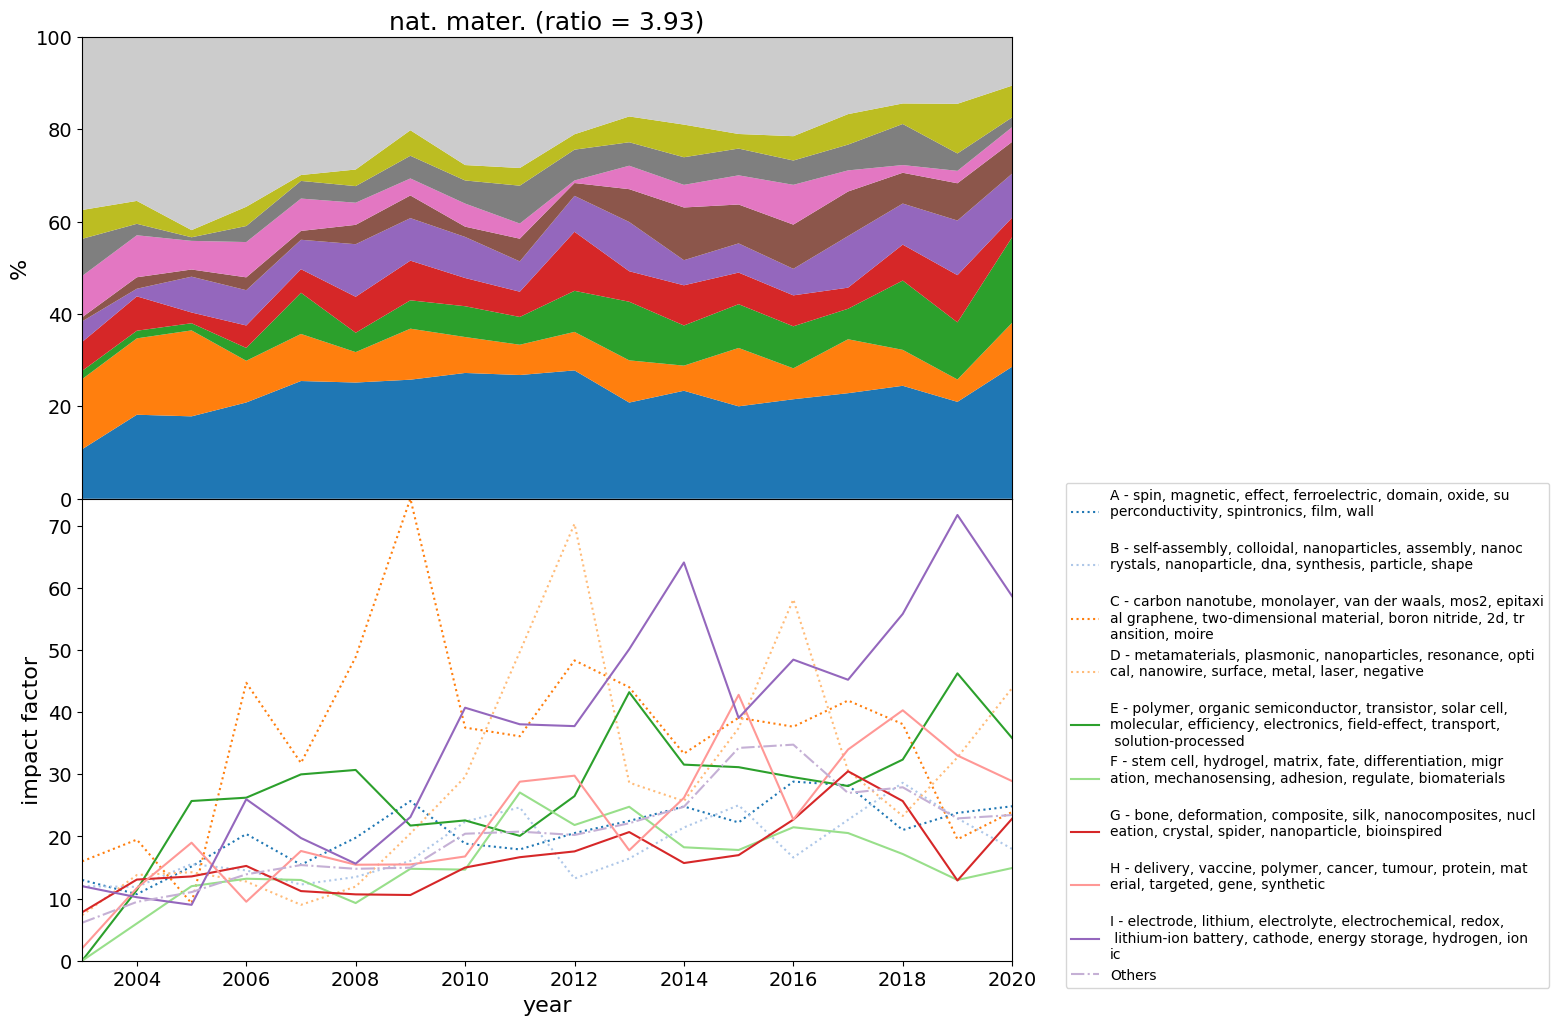

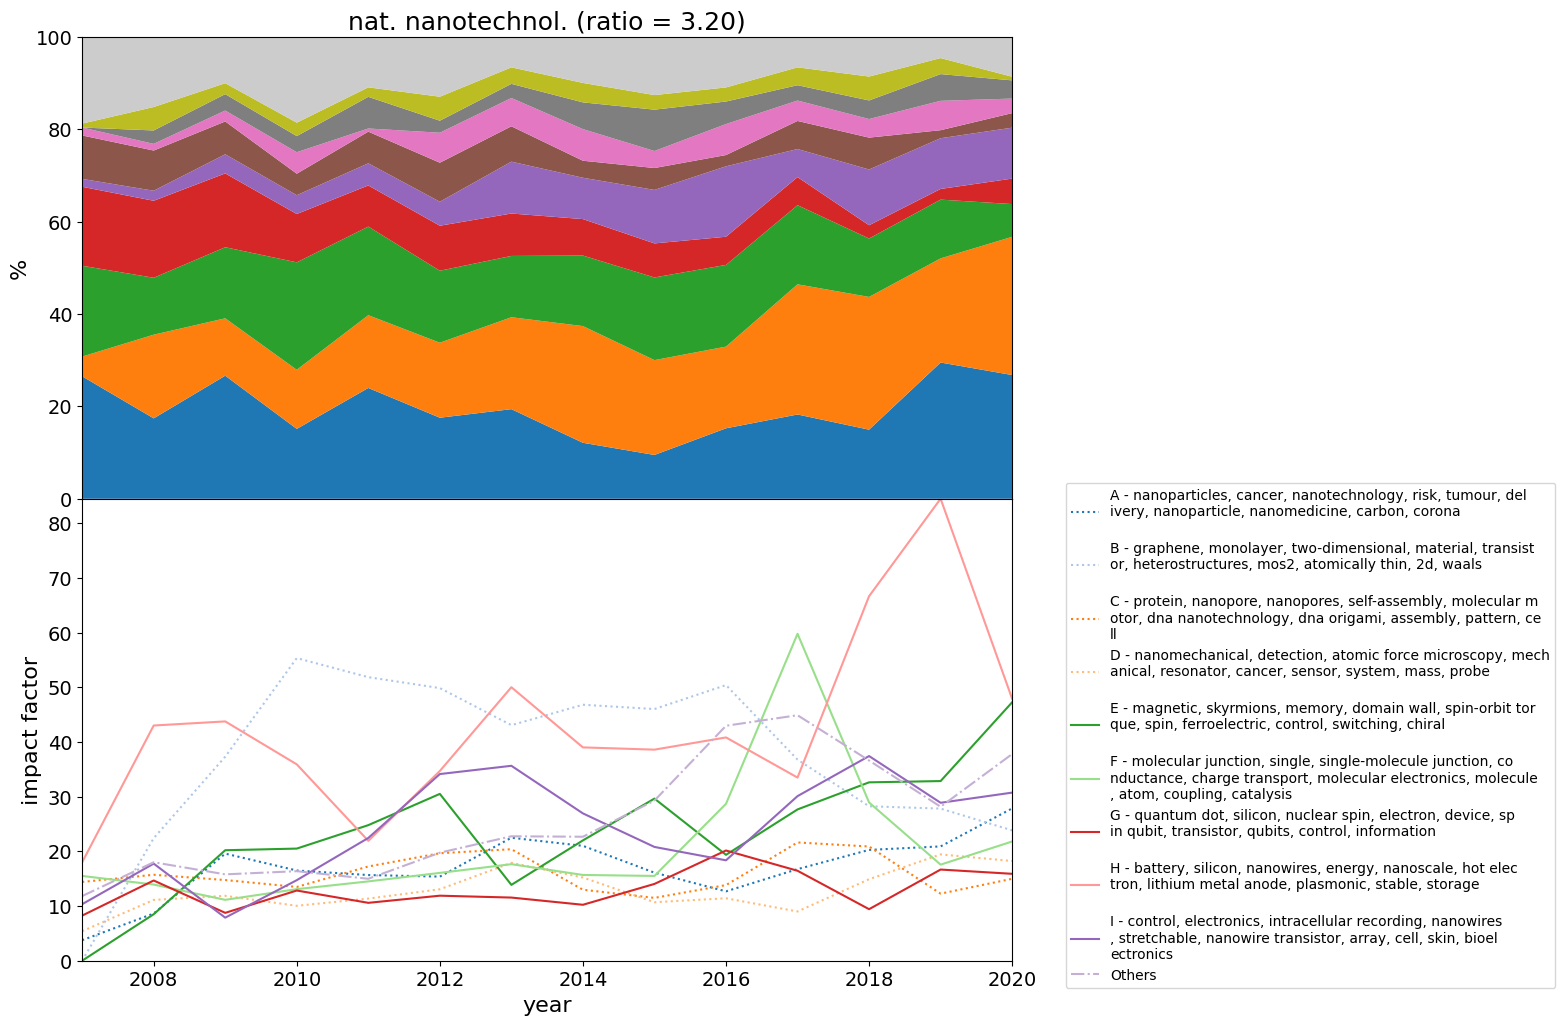

In [111]:
impact_factors = json.loads(open('impact_factor_2020.json').read())
for journal, IF in impact_factors.items():
    fig, subfigs = plt.subplots(2, 1, figsize=(12, 12))
    subfigs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    file = '../results/review2/nets180423/{}_completedata_170423_allbut_bardo_infomap_180423_voting_schema_top10.xnet'.format(journal)
    years = plot_comm_size(file, subfigs[0])
    plt.subplots_adjust(hspace=0)
    ratio = plot_impact_factor(IF, subfigs[1], years)
    subfigs[0].set_title("%s (ratio = %.2f)" % (journal, ratio), fontsize=18)
    fig.savefig("{}commsize_impactfactor.pdf".format(journal))